In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
! pip install scikit-learn

In [6]:
#Read files
listings_df = pd.read_csv(r'C:\Users\rammr001\OneDrive - Vodafone Group\Documents\Data Science\dataset\listings.csv')
#listings_df.head()
calendar_df = pd.read_csv(r'C:\Users\rammr001\OneDrive - Vodafone Group\Documents\Data Science\dataset\calendar.csv')
#calendar_df.head
reviews_df = pd.read_csv(r'C:\Users\rammr001\OneDrive - Vodafone Group\Documents\Data Science\dataset\reviews.csv')
#reviews_df.head()

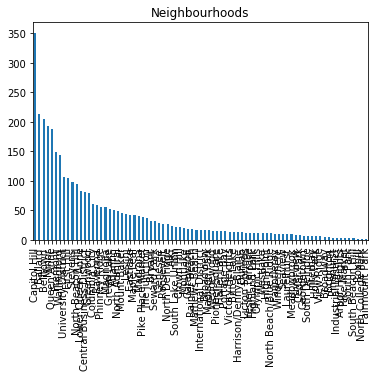

In [29]:
#Neighbourhood stats,
neighbourhood_df =listings_df.neighbourhood.value_counts()

neighbourhood_df.plot(kind="bar");
plt.title("Neighbourhoods");
